# Investigate effect of different ratios of training/testdata

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## read data

In [2]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')

In [3]:
## randomly generated numbers (different script) taken for different random states
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

In [4]:
#testSizes = np.arange(0, 1.01, 0.05)
#for q in testSizes:
#    q = float(np.round(q, 2))
#    print(f'{q}')
#print(f'{testSizes}')

## split datasets in test-/traindata

In [5]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []

testSizes = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
for q in testSizes:
    ## grid sampling 1296
    qX_TRAINs1296 = []
    qX_TESTs1296 = []
    qY_TRAINs1296 = []
    qY_TESTs1296 = []
    
    ## grid sampling 2401
    qX_TRAINs2401 = []
    qX_TESTs2401 = []
    qY_TRAINs2401 = []
    qY_TESTs2401 = []
    
    ## sobol sampling 1
    qX_TRAINsSobol1 = []
    qX_TESTsSobol1 = []
    qY_TRAINsSobol1 = []
    qY_TESTsSobol1 = []
    
    ## sobol sampling 2
    qX_TRAINsSobol2 = []
    qX_TESTsSobol2 = []
    qY_TRAINsSobol2 = []
    qY_TESTsSobol2 = []
    
    for i in random_ints:
        #print(f'{i}')
        ## use the X_test, Y_test data for testing combined with all the data of the other datasets
        X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=q, random_state=i)
        qX_TRAINs1296.append(X_train)
        qY_TRAINs1296.append(Y_train)
        #print(f'{X_test}')
        #print(f'{Y_test}')
        X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
        qX_TESTs1296.append(X_test)
        qY_TESTs1296.append(Y_test)
        #print(f'{X_test}')
        #print(f'{Y_test}')
        
            
        X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=q, random_state=i)
        qX_TRAINs2401.append(X_train),
        qY_TRAINs2401.append(Y_train)
        X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
        qX_TESTs2401.append(X_test)
        qY_TESTs2401.append(Y_test)
        
            
        X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=q, random_state=i)
        qX_TRAINsSobol1.append(X_train)
        qY_TRAINsSobol1.append(Y_train)
        X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
        qX_TESTsSobol1.append(X_test)
        qY_TESTsSobol1.append(Y_test)
        
            
        X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=q, random_state=i)
        qX_TRAINsSobol2.append(X_train)
        qY_TRAINsSobol2.append(Y_train)
        X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
        qX_TESTsSobol2.append(X_test)
        qY_TESTsSobol2.append(Y_test)
        
    ## grid sampling 1296
    X_TRAINs1296.append(qX_TRAINs1296)
    X_TESTs1296.append(qX_TESTs1296)
    Y_TRAINs1296.append(qY_TRAINs1296)
    Y_TESTs1296.append(qY_TESTs1296)
    
    ## grid sampling 2401
    X_TRAINs2401.append(qX_TRAINs2401)
    X_TESTs2401.append(qX_TESTs2401)
    Y_TRAINs2401.append(qY_TRAINs2401)
    Y_TESTs2401.append(qY_TESTs2401)
    
    ## sobol sampling 1
    X_TRAINsSobol1.append(qX_TRAINsSobol1)
    X_TESTsSobol1.append(qX_TESTsSobol1)
    Y_TRAINsSobol1.append(qY_TRAINsSobol1)
    Y_TESTsSobol1.append(qY_TESTsSobol1)
    
    ## sobol sampling 2
    X_TRAINsSobol2.append(qX_TRAINsSobol2)
    X_TESTsSobol2.append(qX_TESTsSobol2)
    Y_TRAINsSobol2.append(qY_TRAINsSobol2)
    Y_TESTsSobol2.append(qY_TESTsSobol2)

## train models and evaluate

In [6]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []

for k in range(0, len(testSizes)):
    ## grid sampling 1296
    qMODELs1296 = []
    qY_PREDICTIONs1296 = []
    qRMSEs1296 = []
    qR2s1296 = []
    qSPEARMANRs1296 = []
    
    ## grid sampling 2401
    qMODELs2401 = []
    qY_PREDICTIONs2401 = []
    qRMSEs2401 = []
    qR2s2401 = []
    qSPEARMANRs2401 = []
    
    ## sobol sampling 1
    qMODELsSobol1 = []
    qY_PREDICTIONsSobol1 = []
    qRMSEsSobol1 = []
    qR2sSobol1 = []
    qSPEARMANRsSobol1 = []
    
    ## sobol sampling 2
    qMODELsSobol2 = []
    qY_PREDICTIONsSobol2 = []
    qRMSEsSobol2 = []
    qR2sSobol2 = []
    qSPEARMANRsSobol2 = []
    
    for i in range(0, len(random_ints)):
        
        ## create the model
        model1296 = LinearRegression()
        #
        model2401 = LinearRegression()
        #
        modelSobol1 = LinearRegression()
        #
        modelSobol2 = LinearRegression()
        
        ## train/fit the model
        model1296.fit(X_TRAINs1296[k][i], Y_TRAINs1296[k][i])
        qMODELs1296.append(model1296)
        #
        model2401.fit(X_TRAINs2401[k][i], Y_TRAINs2401[k][i])
        qMODELs2401.append(model2401)
        #
        modelSobol1.fit(X_TRAINsSobol1[k][i], Y_TRAINsSobol1[k][i])
        qMODELsSobol1.append(modelSobol1)
        #
        modelSobol2.fit(X_TRAINsSobol2[k][i], Y_TRAINsSobol2[k][i])
        qMODELsSobol2.append(modelSobol2)
        
        ## prediction using the test set
        Y_prediction1296 = model1296.predict(X_TESTs1296[k][i])
        qY_PREDICTIONs1296.append(Y_prediction1296)
        #
        Y_prediction2401 = model2401.predict(X_TESTs2401[k][i])
        qY_PREDICTIONs2401.append(Y_prediction2401)
        #
        Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[k][i])
        qY_PREDICTIONsSobol1.append(Y_predictionSobol1)
        #
        Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[k][i])
        qY_PREDICTIONsSobol2.append(Y_predictionSobol2)
        
        ## evaluate with Y_test
        rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[k][i], Y_prediction1296))
        r21296 = r2_score(Y_TESTs1296[k][i], Y_prediction1296)
        spearman_r1296 = stats.spearmanr(Y_TESTs1296[k][i], Y_prediction1296)
        qRMSEs1296.append(rmse1296)
        qR2s1296.append(r21296)
        qSPEARMANRs1296.append(spearman_r1296.statistic)
        #
        rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[k][i], Y_prediction2401))
        r22401 = r2_score(Y_TESTs2401[k][i], Y_prediction2401)
        spearman_r2401 = stats.spearmanr(Y_TESTs2401[k][i], Y_prediction2401)
        qRMSEs2401.append(rmse2401)
        qR2s2401.append(r22401)
        qSPEARMANRs2401.append(spearman_r2401.statistic)
        #
        rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[k][i], Y_predictionSobol1))
        r2Sobol1 = r2_score(Y_TESTsSobol1[k][i], Y_predictionSobol1)
        spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[k][i], Y_predictionSobol1)
        qRMSEsSobol1.append(rmseSobol1)
        qR2sSobol1.append(r2Sobol1)
        qSPEARMANRsSobol1.append(spearman_rSobol1.statistic)
        #
        rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[k][i], Y_predictionSobol2))
        r2Sobol2 = r2_score(Y_TESTsSobol2[k][i], Y_predictionSobol2)
        spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[k][i], Y_predictionSobol2)
        qRMSEsSobol2.append(rmseSobol2)
        qR2sSobol2.append(r2Sobol2)
        qSPEARMANRsSobol2.append(spearman_rSobol2.statistic)

    ## grid sampling 1296
    MODELs1296.append(qMODELs1296)
    Y_PREDICTIONs1296.append(qY_PREDICTIONs1296)
    RMSEs1296.append(qRMSEs1296)
    R2s1296.append(qR2s1296)
    SPEARMANRs1296.append(qSPEARMANRs1296)
    
    ## grid sampling 2401
    MODELs2401.append(qMODELs2401)
    Y_PREDICTIONs2401.append(qY_PREDICTIONs2401)
    RMSEs2401.append(qRMSEs2401)
    R2s2401.append(qR2s2401)
    SPEARMANRs2401.append(qSPEARMANRs2401)
    
    ## sobol sampling 1
    MODELsSobol1.append(qMODELsSobol1)
    Y_PREDICTIONsSobol1.append(qY_PREDICTIONsSobol1)
    RMSEsSobol1.append(qRMSEsSobol1)
    R2sSobol1.append(qR2sSobol1)
    SPEARMANRsSobol1.append(qSPEARMANRsSobol1)
    
    ## sobol sampling 2
    MODELsSobol2.append(qMODELsSobol2)
    Y_PREDICTIONsSobol2.append(qY_PREDICTIONsSobol2)
    RMSEsSobol2.append(qRMSEsSobol2)
    R2sSobol2.append(qR2sSobol2)
    SPEARMANRsSobol2.append(qSPEARMANRsSobol2)

## calculate average RMSE/R2/SpearmanRs

In [11]:
## grid sampling 1296
RMSEs1296_means = []
R2s1296_means = []
SPEARMANRs1296_means = []

## grid sampling 2401
RMSEs2401_means = []
R2s2401_means = []
SPEARMANRs2401_means = []

## sobol sampling 1
RMSEsSobol1_means = []
R2sSobol1_means = []
SPEARMANRsSobol1_means = []

## sobol sampling 2
RMSEsSobol2_means = []
R2sSobol2_means = []
SPEARMANRsSobol2_means = []
for k in range(0, len(testSizes)):
    ## grid sampling 1296
    rmse1296_mean = np.mean(RMSEs1296[k])
    RMSEs1296_means.append(rmse1296_mean)
    #
    r21296_mean = np.mean(R2s1296[k])
    R2s1296_means.append(r21296_mean)
    #
    spearmanr1296_mean = np.mean(SPEARMANRs1296[k])
    SPEARMANRs1296_means.append(spearmanr1296_mean)

    ## grid sampling 2401
    rmse2401_mean = np.mean(RMSEs2401[k])
    RMSEs2401_means.append(rmse2401_mean)
    #
    r22401_mean = np.mean(R2s2401[k])
    R2s2401_means.append(r22401_mean)
    #
    spearmanr2401_mean = np.mean(SPEARMANRs2401[k])
    SPEARMANRs2401_means.append(spearmanr2401_mean)

    ## Sobol 1
    rmseSobol1_mean = np.mean(RMSEsSobol1[k])
    RMSEsSobol1_means.append(rmseSobol1_mean)
    #
    r2Sobol1_mean = np.mean(R2sSobol1[k])
    R2sSobol1_means.append(r2Sobol1_mean)
    #
    spearmanrSobol1_mean = np.mean(SPEARMANRsSobol1[k])
    SPEARMANRsSobol1_means.append(spearmanrSobol1_mean)

    ## Sobol 2
    rmseSobol2_mean = np.mean(RMSEsSobol2[k])
    RMSEsSobol2_means.append(rmseSobol2_mean)
    #
    r2Sobol2_mean = np.mean(R2sSobol2[k])
    R2sSobol2_means.append(r2Sobol2_mean)
    #
    spearmanrSobol2_mean = np.mean(SPEARMANRsSobol2[k])
    SPEARMANRsSobol2_means.append(spearmanrSobol2_mean)

In [19]:
## grid sampling 1296
#print(f'{RMSEs1296_means}')
#print(f'{R2s1296_means}')
#print(f'{SPEARMANRs1296_means}')

## grid sampling 2401
#print(f'{RMSEs2401_means}')
#print(f'{R2s2401_means}')
#print(f'{SPEARMANRs2401_means}')

## sobol sampling 1
#print(f'{RMSEsSobol1_means}')
#print(f'{R2sSobol1_means}')
#print(f'{SPEARMANRsSobol1_means}')

## sobol sampling 2
print(f'{RMSEsSobol2_means}')
print(f'{R2sSobol2_means}')
print(f'{SPEARMANRsSobol2_means}')

[np.float64(72.08074088274383), np.float64(72.21786411910665), np.float64(72.3317930791388), np.float64(72.42144015646083), np.float64(72.57319448375937), np.float64(72.7362949647346), np.float64(72.85081590954086), np.float64(73.05083478460446), np.float64(73.16431190526359), np.float64(73.27418783334113), np.float64(73.44184018164582), np.float64(73.65358634571443), np.float64(73.80599288718294), np.float64(73.99543693983651), np.float64(74.24576273347884), np.float64(74.54773401502642), np.float64(74.8107629635749), np.float64(75.81691531277804), np.float64(76.1800713273589)]
[np.float64(0.3806328444348214), np.float64(0.386106098828357), np.float64(0.390890028736421), np.float64(0.395323348288425), np.float64(0.39742069671693847), np.float64(0.3997955527658307), np.float64(0.4028778740356012), np.float64(0.4038780425201514), np.float64(0.4068172609841824), np.float64(0.409489381915505), np.float64(0.41054811975485267), np.float64(0.4105799880710214), np.float64(0.4124440036146641),

## plot

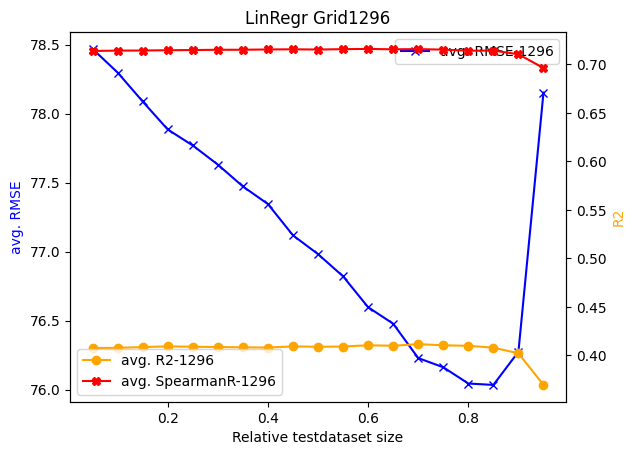

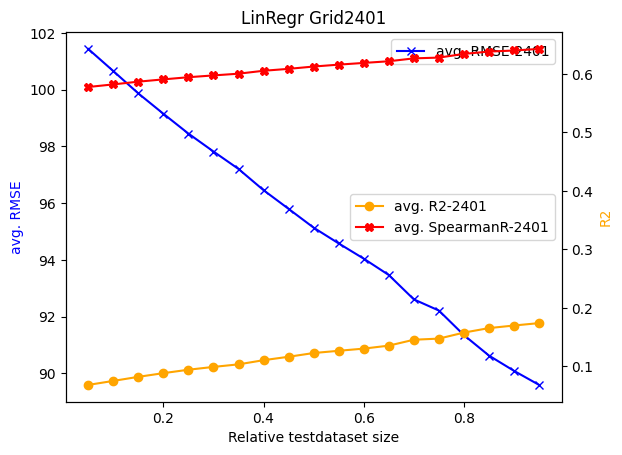

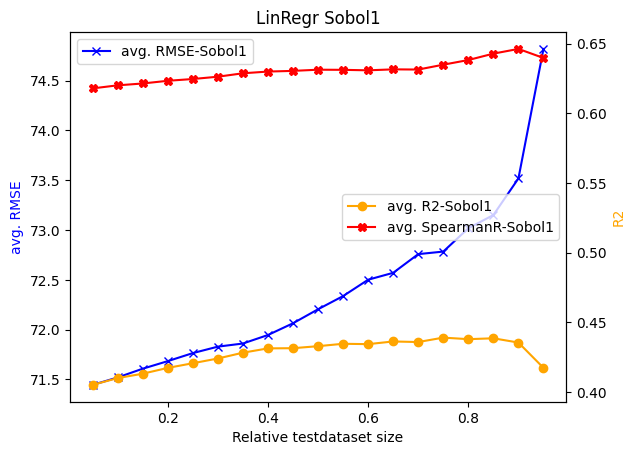

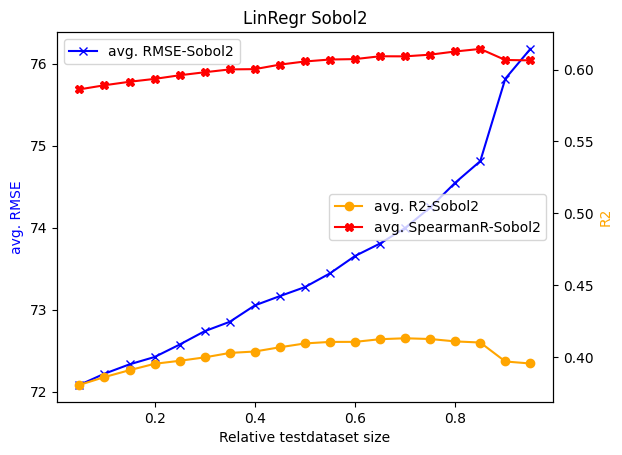

In [14]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(testSizes, RMSEs1296_means, '-x', color='blue', label='avg. RMSE-1296')
ax1.set_xlabel('Relative testdataset size')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('LinRegr Grid1296')

ax2 = ax1.twinx()
ax2.plot(testSizes, R2s1296_means, '-o', color='orange', label='avg. R2-1296')
ax2.plot(testSizes, SPEARMANRs1296_means, '-X', color='red', label='avg. SpearmanR-1296')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_GRID1296-Testdataset-size.png')


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(testSizes, RMSEs2401_means, '-x', color='blue', label='avg. RMSE-2401')
ax1.set_xlabel('Relative testdataset size')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('LinRegr Grid2401')

ax2 = ax1.twinx()
ax2.plot(testSizes, R2s2401_means, '-o', color='orange', label='avg. R2-2401')
ax2.plot(testSizes, SPEARMANRs2401_means, '-X', color='red', label='avg. SpearmanR-2401')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_GRID2401-Testdataset-size.png')


## Sobol 1
fig, ax1 = plt.subplots()
ax1.plot(testSizes, RMSEsSobol1_means, '-x', color='blue', label='avg. RMSE-Sobol1')
ax1.set_xlabel('Relative testdataset size')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('LinRegr Sobol1')

ax2 = ax1.twinx()
ax2.plot(testSizes, R2sSobol1_means, '-o', color='orange', label='avg. R2-Sobol1')
ax2.plot(testSizes, SPEARMANRsSobol1_means, '-X', color='red', label='avg. SpearmanR-Sobol1')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_Sobol1-Testdataset-size.png')


## Sobol 2
fig, ax1 = plt.subplots()
ax1.plot(testSizes, RMSEsSobol2_means, '-x', color='blue', label='avg. RMSE-Sobol2')
ax1.set_xlabel('Relative testdataset size')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('LinRegr Sobol2')

ax2 = ax1.twinx()
ax2.plot(testSizes, R2sSobol2_means, '-o', color='orange', label='avg. R2-Sobol2')
ax2.plot(testSizes, SPEARMANRsSobol2_means, '-X', color='red', label='avg. SpearmanR-Sobol2')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('LinRegr_Sobol2-Testdataset-size.png')